In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [6]:
win_name = "image"
img_ori = cv.imread("LEGO_ROSTROS\P2.jpg")
img_new = cv.imread("LEGO_ROSTROS\P10.jpg")

img_ori_gray = cv.cvtColor(img_ori, cv.COLOR_RGB2GRAY)
img_new_gray = cv.cvtColor(img_new, cv.COLOR_RGB2GRAY)

In [27]:
#detect ORB features and compute descriptors
MAX_NUM_FEATURES = 100
orb = cv.ORB_create(MAX_NUM_FEATURES)

keypoints1, descriptors1 = orb.detectAndCompute(img_ori_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(img_new_gray, None)

In [28]:
#Display
img_ori_display = cv.drawKeypoints(img_ori, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv.DRAW_MATCHES_FLAGS_DEFAULT)
img_new_display = cv.drawKeypoints(img_new, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=cv.DRAW_MATCHES_FLAGS_DEFAULT)

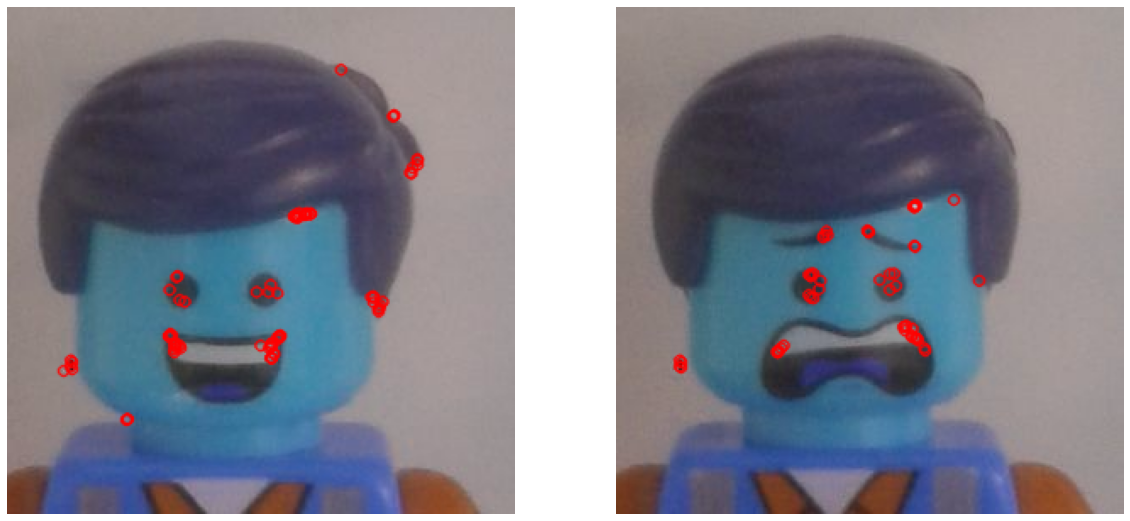

In [29]:
plt.figure(figsize=[20, 10])
plt.subplot(121); plt.axis('off'); plt.imshow(img_ori_display)
plt.subplot(122); plt.axis('off'); plt.imshow(img_new_display)

In [37]:
# Match features
matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

#Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

#remove not so good matches
numGoodMatches = int(len(matches) * .25)
matches = matches[:numGoodMatches]

(-0.5, 599.5, 299.5, -0.5)

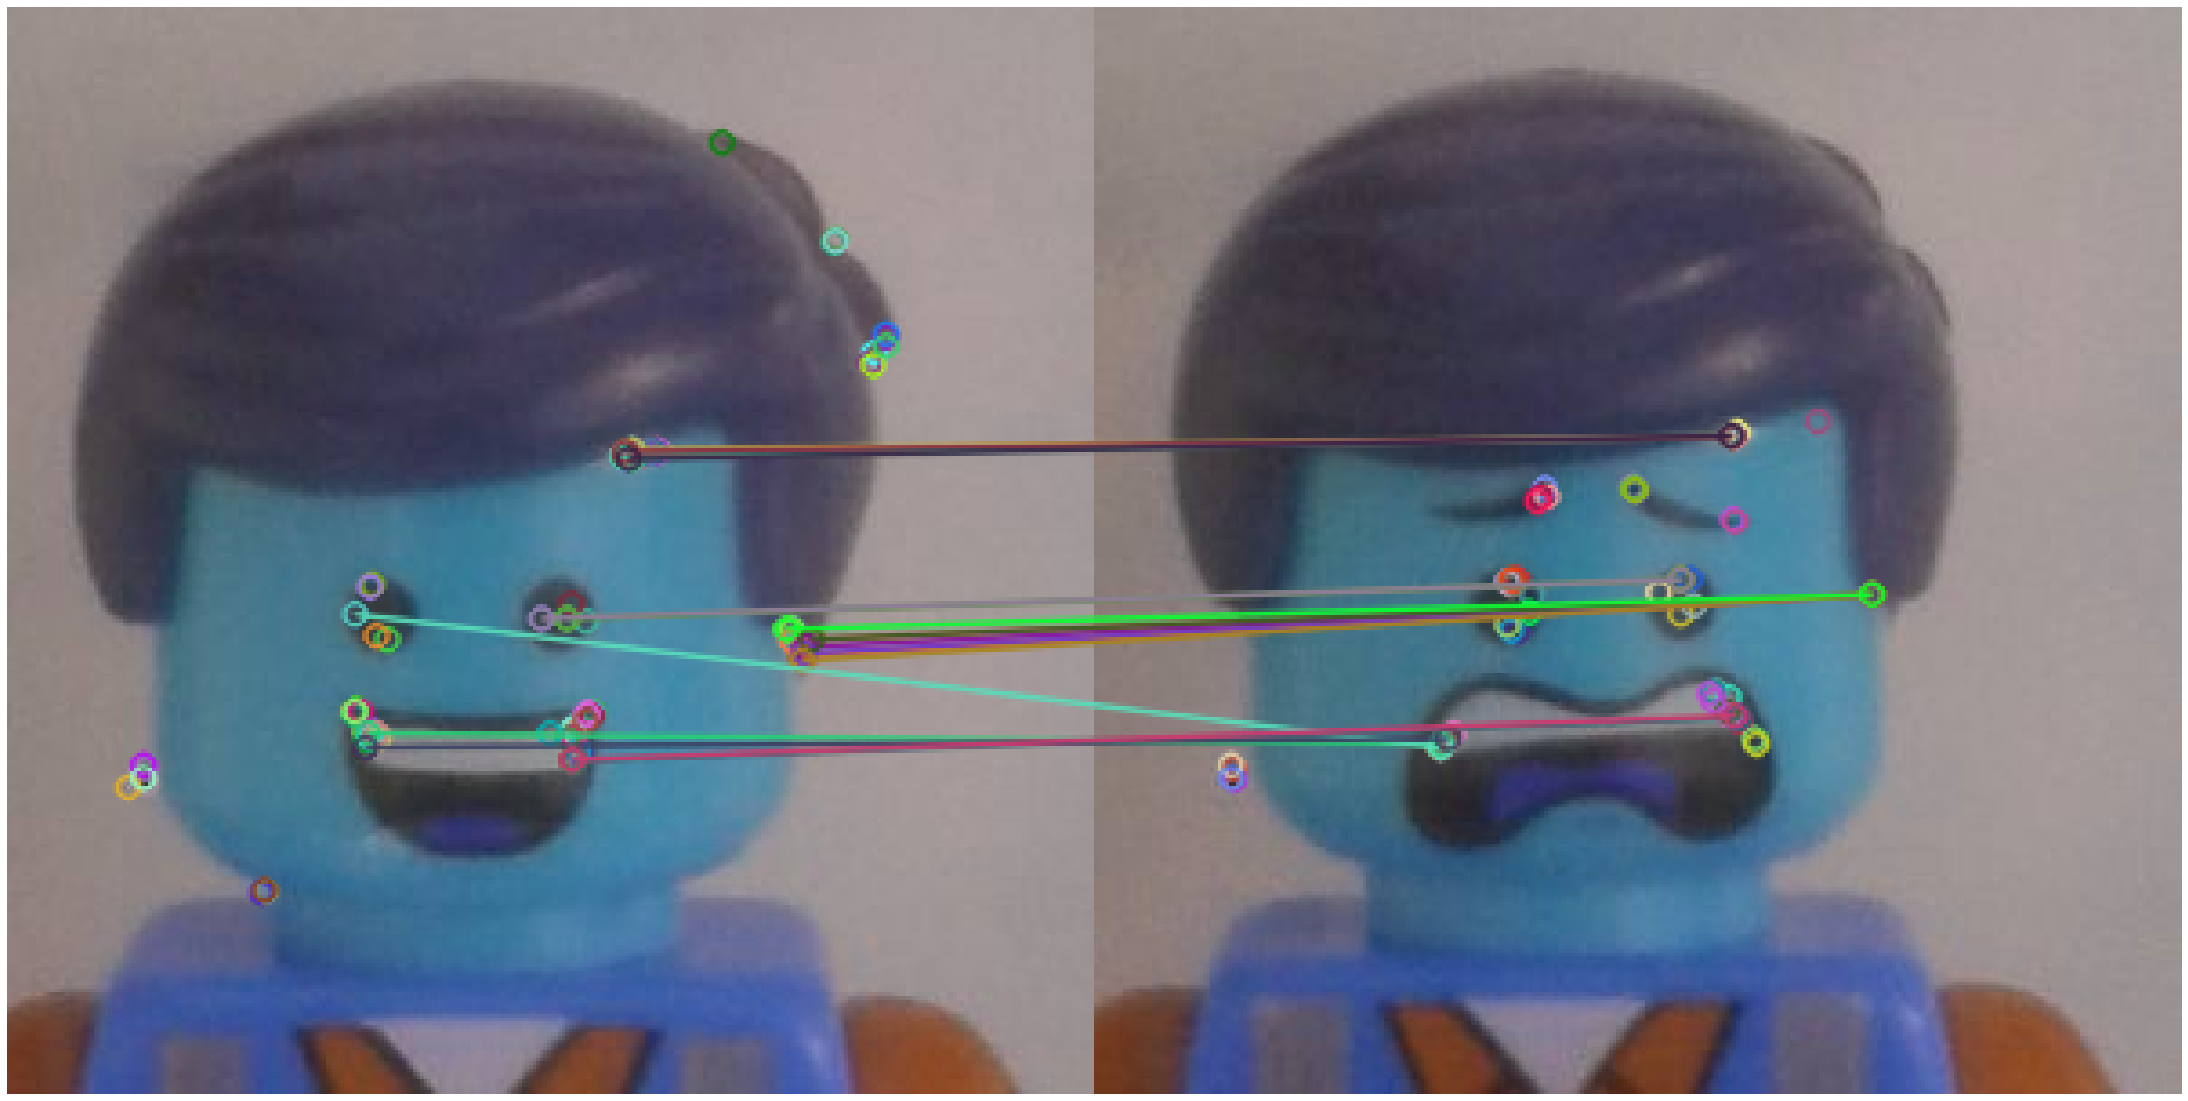

In [38]:
#Draw top matches
img_matches = cv.drawMatches(img_ori, keypoints1, img_new, keypoints2, matches, None)

plt.figure(figsize=[40,20])
plt.imshow(img_matches); plt.axis("off")

In [40]:
#Find Homography
#Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

#find homography
h, mask = cv.findHomography(points2, points1, cv.RANSAC)

(-0.5, 299.5, 299.5, -0.5)

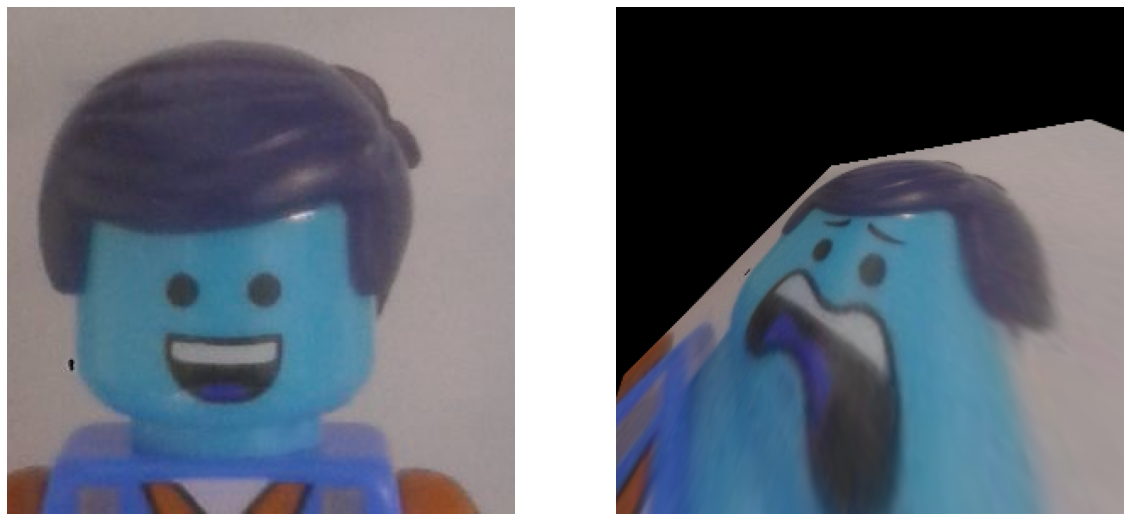

In [43]:
#Warp image
#Use homography to warp image
height, width, channels = img_ori.shape
img_new_reg = cv.warpPerspective(img_new, h, (width, height))

#disply results
plt.figure(figsize=[20, 10])
plt.subplot(121); plt.imshow(img_ori); plt.axis('off')
plt.subplot(122); plt.imshow(img_new_reg); plt.axis('off')